# Evaluation Project - 1 (Baseball Case Study)

### Problem Statement : 

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.


### Input Features : 

 Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors.
 
 ### Output : 
 
 Number of predicted wins (W)

In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's Import the baseball dataset

baseball_data = pd.read_csv("baseball.csv")

baseball_data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# Let's describe the dataset

baseball_data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [4]:
# In this dataset, the columns name is not understandable to analyze.
# Let's first change the columns name short form  to full form to understand the dataset given in the Input Features.


baseball_data = baseball_data.rename(columns = {"W" : "Wins", "R" : "Runs", "AB" : "At Bats", "H" : "Hits", "2B" : "Doubles",
                               "3B" : "Triples", "HR" : "Homeruns", "BB" : "Walks", "SO" : "Strikeouts", "ER" : "Earned Runs",
                               "SB" : "Stolen Bases", "RA" : "Runs Allowed", "ERA" : "Earned Run Average (ERA)",
                               "CG" : "Complete Games", "SHO" : "Shutouts", "SV" : "Saves", "E" : "Errors"})


baseball_data.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Now the dataset is looks good and understandable.

In [5]:
# Shape of the dataset

print("Shape of the Dataset : ",baseball_data.shape)

Shape of the Dataset :  (30, 17)


The dataset has 30 rows and 17 columns. In which 16 columns is our features and 1 is our target. Target column is Wins as alread discussed in the problem statement.

In [6]:
# Quick information about dataset

baseball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average (ERA)  30 non-null     float64
 13  Complete Games            30 non-null     int64  
 14  Shutouts    

Our data is looks very good becasue there is not a single coulmn has object value. Our Target Column is "Wins"

In [7]:
# Let's the the null values if any present in this dataset

baseball_data.isnull().sum()

Wins                        0
Runs                        0
At Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
Complete Games              0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

It seems that there is not a single column has null value.

In [8]:
# Let's check the 0 values if present in the dataset

for column in baseball_data:
    print(column+"  "+str(baseball_data[baseball_data[column]==0].shape[0]))

Wins  0
Runs  0
At Bats  0
Hits  0
Doubles  0
Triples  0
Homeruns  0
Walks  0
Strikeouts  0
Stolen Bases  0
Runs Allowed  0
Earned Runs  0
Earned Run Average (ERA)  0
Complete Games  3
Shutouts  0
Saves  0
Errors  0


Complete Games has only 3 "0" values. So, let's deal with it..

In [9]:
# Dealing with "0" which is present in the "Complete Games" column.

baseball_data["Complete Games"] = baseball_data["Complete Games"].replace(0,baseball_data["Complete Games"].mean())

In [10]:
# Let's check the value "0" again

for column in baseball_data:
    print(column+"  "+str(baseball_data[baseball_data[column]==0].shape[0]))

Wins  0
Runs  0
At Bats  0
Hits  0
Doubles  0
Triples  0
Homeruns  0
Walks  0
Strikeouts  0
Stolen Bases  0
Runs Allowed  0
Earned Runs  0
Earned Run Average (ERA)  0
Complete Games  0
Shutouts  0
Saves  0
Errors  0


Now it is clear that No any single column has "0" value. Let's continue...

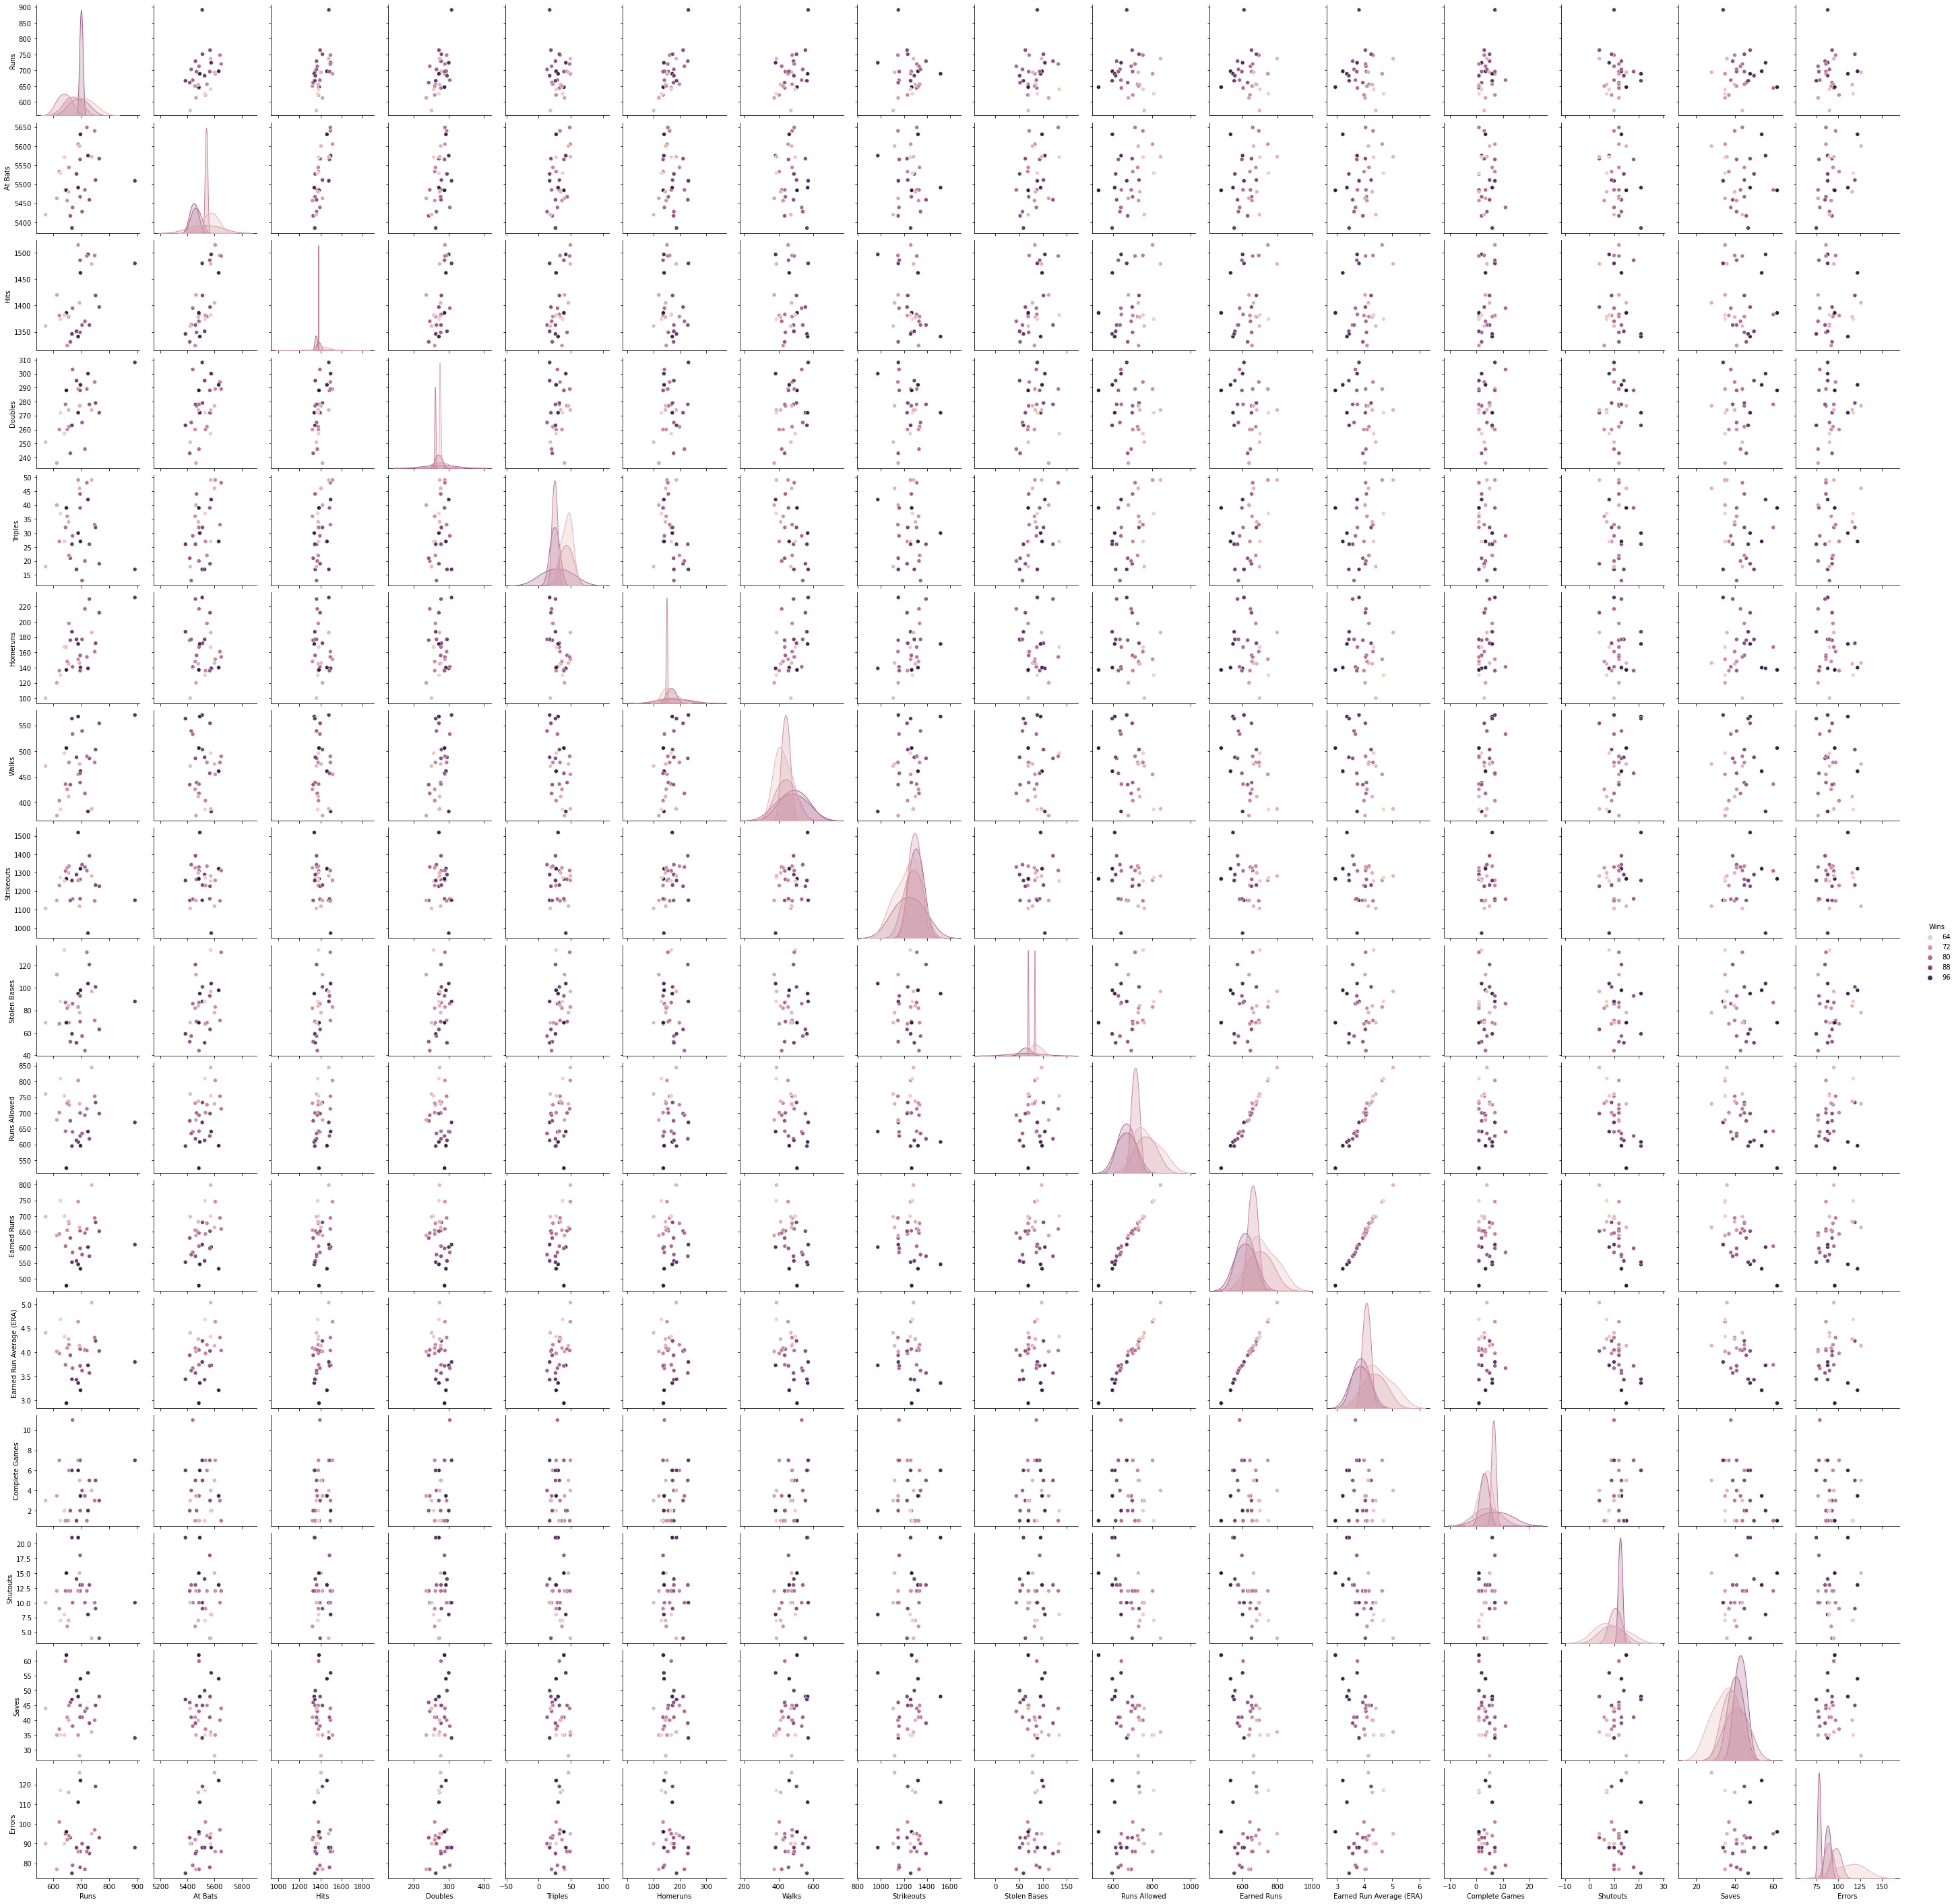

In [11]:
# Let's check the paiplot to check that how a features is related to the target column

sns.pairplot(baseball_data, hue="Wins")

Pairplot Visualizing is not easy due to large dataset. So, let's visualize with correlation matrix

In [12]:
# Let's check the correlation Matrix

corr = baseball_data.corr()

corr

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.121311,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.222222,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.068802,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.197888,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.206027,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.104248,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.151876,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.382151,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.076233,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.015614,-0.106563,-0.183418,0.079149


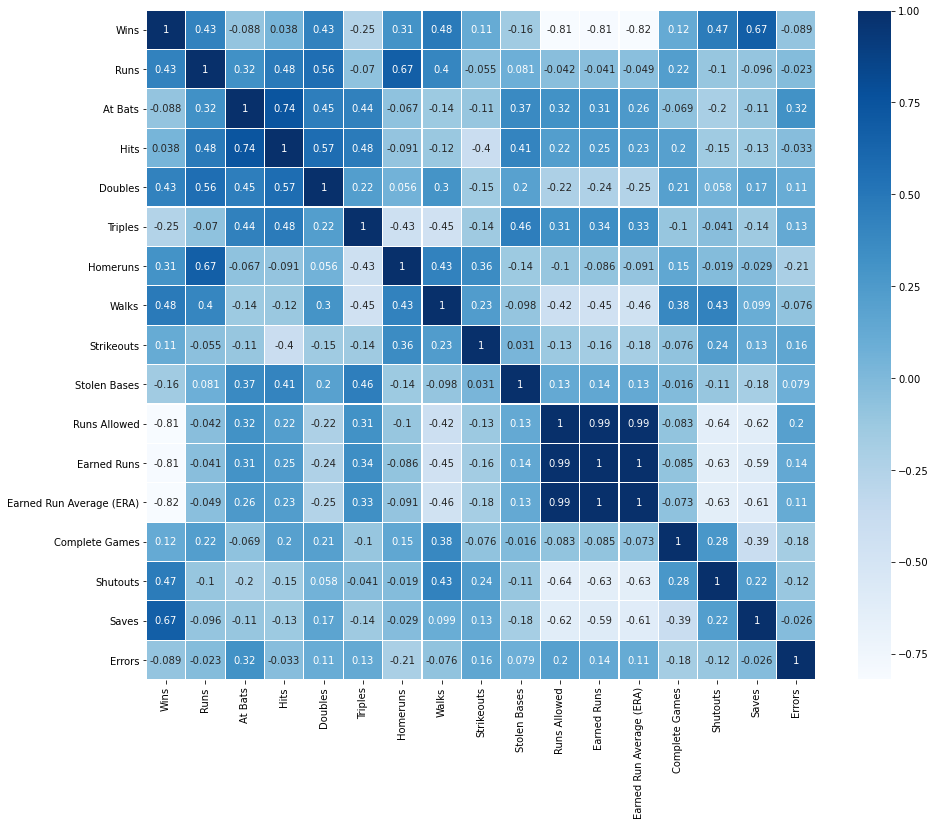

In [13]:
# Let's plot a heatmap for visualizing the correlation in better way

plt.figure(figsize = (15,15), facecolor='white')
sns.heatmap(corr, cbar=True, annot=True, cbar_kws={"shrink" : .82}, annot_kws={"size" : 10}, cmap="Blues",
           fmt=".2g", linewidths=.2, square=True)
plt.show()

"Earned Runs" and "Earned Run Average (ERA)" is 100% correlated to each other.

"Runs Allowed" is 99% correlated to "Earned Runs" & "Earned Runs Averages (ERA)".

Let's drop the "Earned Run Average (ERA)" & "Runs Allowed" and then again will check the correlation matrix.

In [14]:
# Droping multicollinearities columns

baseball_data.drop("Earned Run Average (ERA)", axis=1, inplace=True)
baseball_data.drop("Runs Allowed", axis=1, inplace=True)

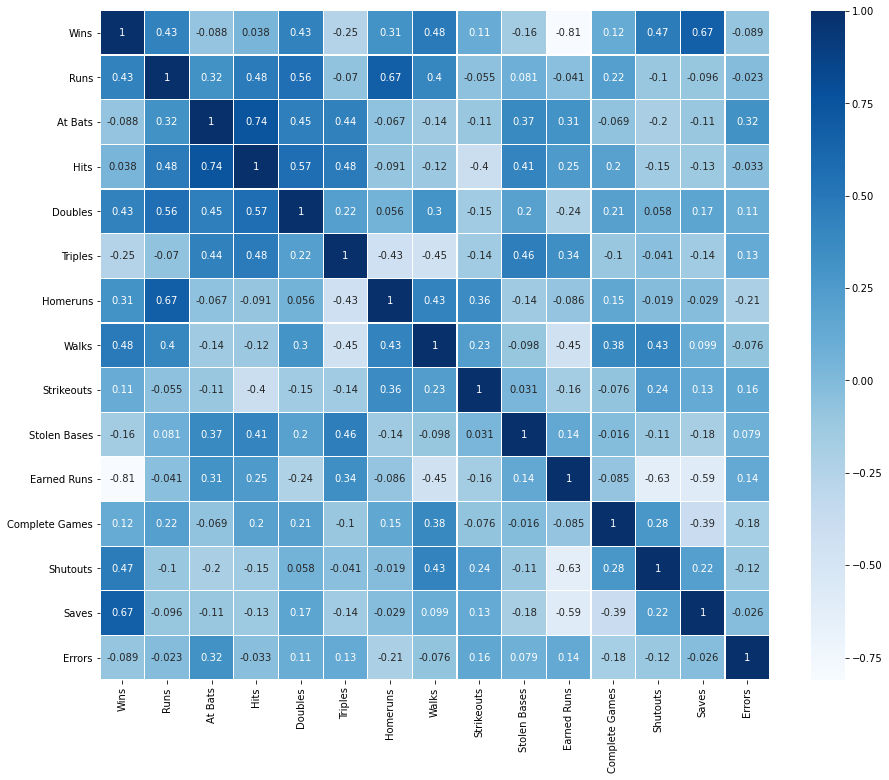

In [15]:
# Let's again analyze the heatmap

corr = baseball_data.corr()

plt.figure(figsize = (15,15), facecolor='white')
sns.heatmap(corr, cbar=True, annot=True, cbar_kws={"shrink" : .82}, annot_kws={"size" : 10}, cmap="Blues",
           fmt=".2g", linewidths=.2, square=True)
plt.show()

Now the dataset looks good and no any fearuter is highly correlated to other one.

<AxesSubplot:title={'center':'Features vs Target'}>

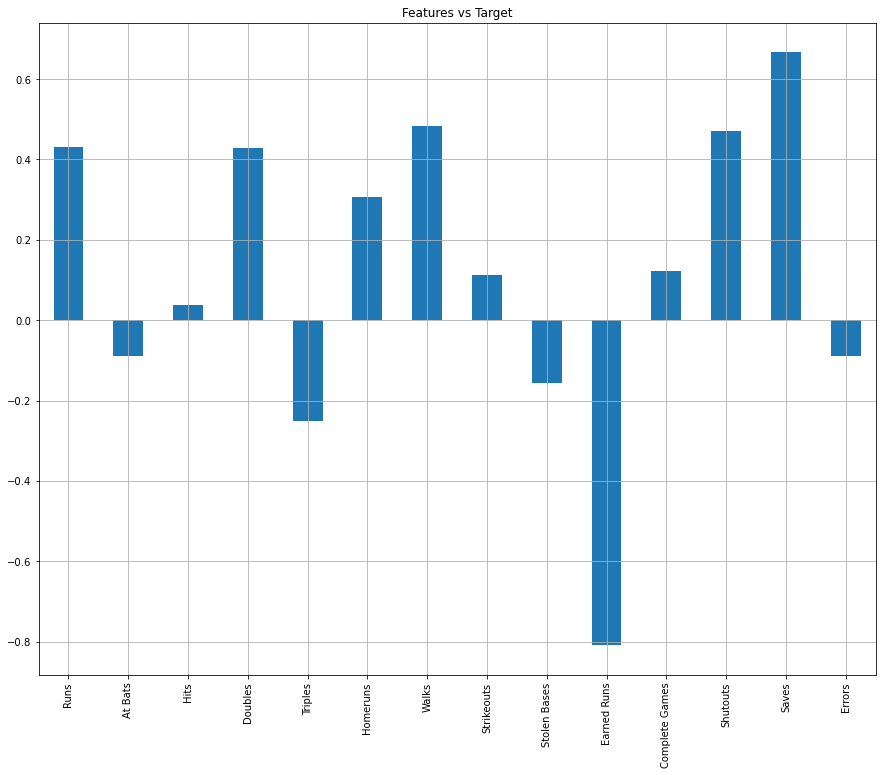

In [16]:
# All features vs Target

baseball_data.drop("Wins",axis=1).corrwith(baseball_data["Wins"]).plot(kind="bar",grid=True, figsize=(15,12),
                                                                      title="Features vs Target")

Some features are playing negative role and some feature are playing positive role with Wins.

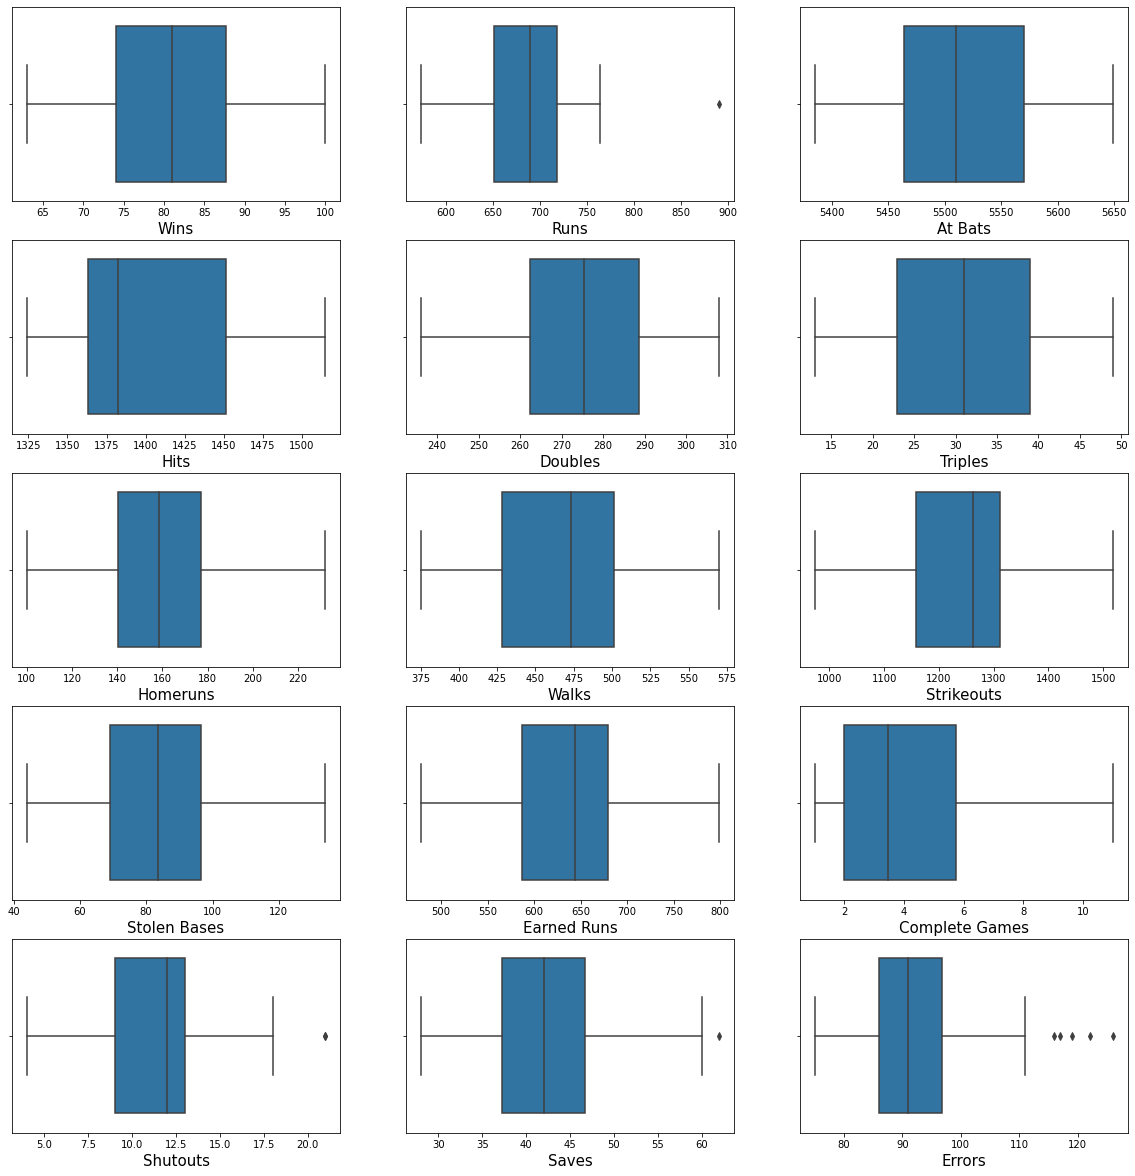

In [17]:
# Let's check the outliers

plt.figure(figsize = (20,25), facecolor='white')
graphplot = 1
for column in baseball_data:
    if graphplot <=18:
        ax=plt.subplot(6,3,graphplot)
        sns.boxplot(baseball_data[column])
        plt.xlabel(column,fontsize=15)
    graphplot+=1
plt.show()

Outlers found in columns :

"Errors" , "Saves" , "Shutouts"  and "Runs"

Let's remove these outliers with some techniques

In [18]:
# IQR skewness removing technique

q1 = baseball_data.quantile(0.25)
q3 = baseball_data.quantile(0.75)
iqr = q3-q1

# Runs
out_runs = (q3.Runs + (1.5*iqr.Runs))
index = np.where(baseball_data["Runs"] > out_runs)
baseball_data["Runs"] = baseball_data["Runs"].drop(baseball_data["Runs"].index[index])
baseball_data["Runs"] = baseball_data["Runs"].fillna(baseball_data["Runs"].mean())

# Errors
out_errors = (q3.Errors + (1.5*iqr.Errors))
index_1 = np.where(baseball_data["Errors"] > out_errors)
baseball_data["Errors"] = baseball_data["Errors"].drop(baseball_data["Errors"].index[index_1])
baseball_data["Errors"] = baseball_data["Errors"].fillna(baseball_data["Errors"].mean())

# Shutouts
#out_shutouts = (q3.Shutouts + (1.5*iqr.Shutouts))
#index_2 = np.where(baseball_data["Shutouts"] > out_shutouts)
#baseball_data = baseball_data.drop(baseball_data.index[index_2])

# Saves
#out_saves = (q3.Saves + (1.5*iqr.Saves))
#index_3 = np.where(baseball_data["Saves"] > out_saves)
#baseball_data = baseball_data.drop(baseball_data.index[index_3])



In [19]:
# Let's check the skewness

baseball_data.skew()

Wins              0.047089
Runs             -0.218636
At Bats           0.183437
Hits              0.670254
Doubles          -0.230650
Triples           0.129502
Homeruns          0.516441
Walks             0.158498
Strikeouts       -0.156065
Stolen Bases      0.479893
Earned Runs       0.058710
Complete Games    0.836848
Shutouts          0.565790
Saves             0.657524
Errors            0.375229
dtype: float64

Skewness in some columns. Let' fix it...

In [20]:
# Skewness removing technique

for index in baseball_data.skew().index:
    if baseball_data.skew().loc[index]>0.5:
        baseball_data[index] = np.sqrt(baseball_data[index])
    if baseball_data.skew().loc[index]<-0.5:
        baseball_data[index] = np.cbrt(baseball_data[index])

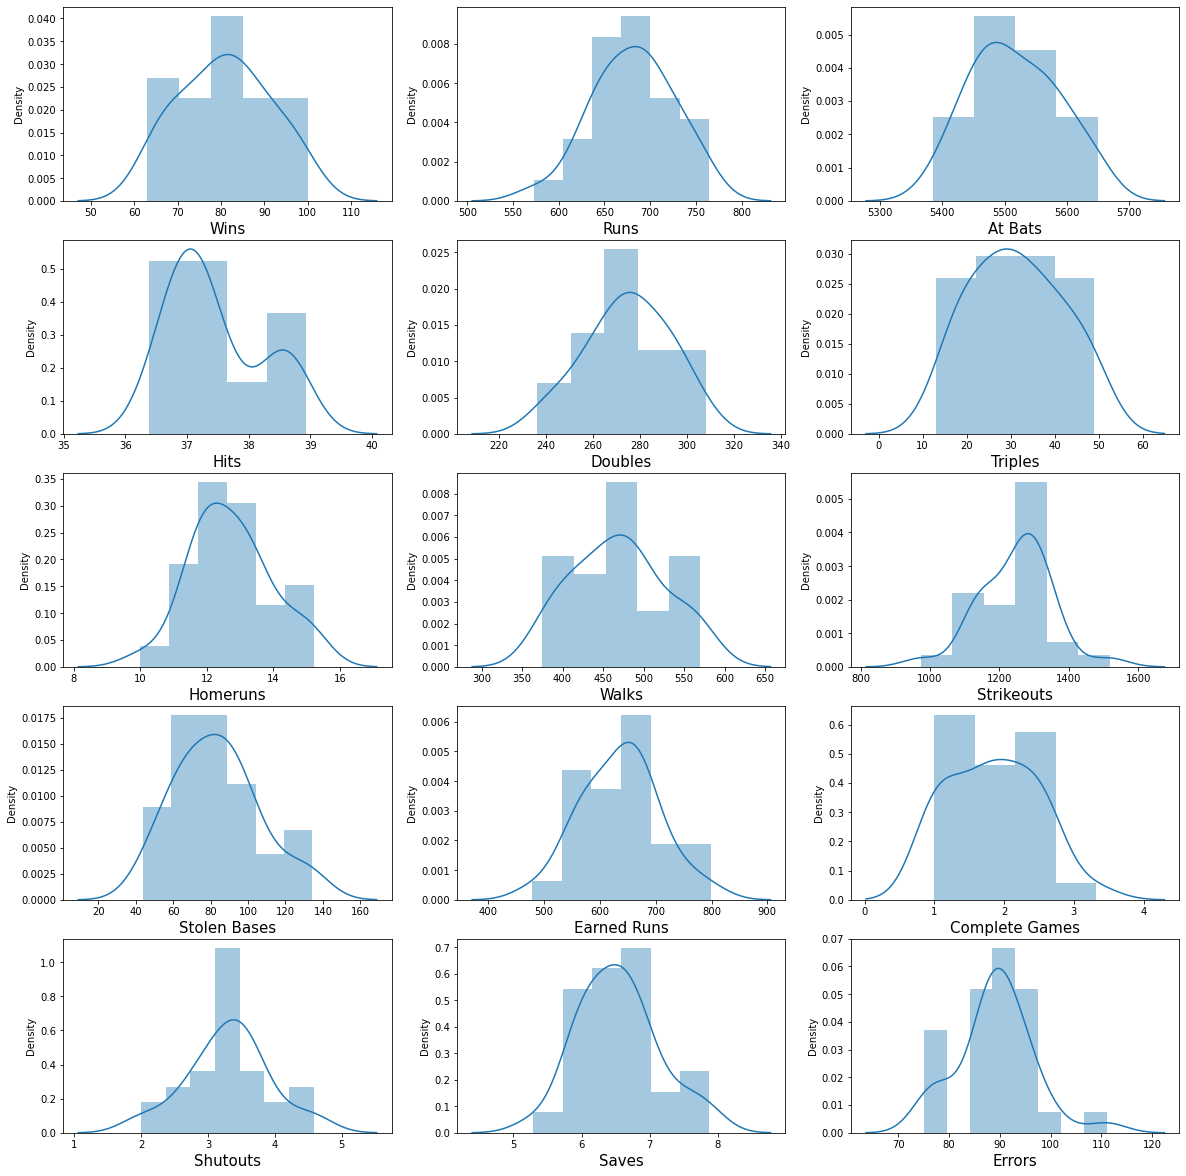

In [21]:
# Let's check the distplot

plt.figure(figsize = (20,25), facecolor='white')
graphplot = 1
for column in baseball_data:
    if graphplot <=18:
        ax=plt.subplot(6,3,graphplot)
        sns.distplot(baseball_data[column])
        plt.xlabel(column,fontsize=15)
    graphplot+=1
plt.show()

The distribution is looks good. Let's continue...

In [22]:
# Shape of the dataset after removing the outlers

baseball_data.shape

(30, 15)

In [23]:
# Setting the index

baseball_data.set_index([list(range(1,31))],inplace=True)

In [24]:
# Let's separate the inputs and output before proceeding further process

df_x = baseball_data.drop(columns = ["Wins"], axis=1)
y = baseball_data["Wins"]

In [25]:
# Let's do scaling to check the VIF Score

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_x)

In [26]:
# Let's check the VIF Score

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif["Features"] = df_x.columns

vif

,VIF Score,Features
0,3.119193,Runs
1,3.849785,At Bats
2,5.613328,Hits
3,2.614063,Doubles
4,3.172290,Triples
5,2.972528,Homeruns
6,2.651727,Walks
7,2.055572,Strikeouts
8,1.752290,Stolen Bases
9,4.282895,Earned Runs


There is no problem becasue the VIF scores of all the features are less than 10.

In [27]:
# Import the necessary libraries for model building

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from time import time

In [28]:
# Let's find the best random state

def model(mod):
    max_score = 0
    max_state = 0
    for i in range(1,201):
        x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = i)
        start = time()
        mod.fit(x_train, y_train)
        y_pred = mod.predict(x_test)
        score = r2_score(y_test, y_pred)
        end =time()
        if score > max_score:
            max_score = score
            max_state = i
    print("Time taken by model : {:.4f} seconds".format(end-start))
    print("Best R2 Score corresponding to ",max_state,"is ",max_score)
    print("Cross Validation Score is : ",cross_val_score(mod,X,y,cv=5,scoring='r2').mean())

In [29]:
# Linear Regression

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
model(LR)

Time taken by model : 0.0000 seconds
Best R2 Score corresponding to  157 is  0.9468138942734582
Cross Validation Score is :  -0.873759221380244


In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 157)

In [31]:
from sklearn.tree import DecisionTreeRegressor


DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
y_pre = DTR.predict(x_test)
score = r2_score(y_test,y_pre)
cross = cross_val_score(DTR,X,y,cv=5,scoring='r2').mean()

print("Best R2 Score is : ",score)
print("Cross Validation Score is : ",cross)

Best R2 Score is :  0.11711711711711714
Cross Validation Score is :  -2.248088686035898


In [32]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
KNR.fit(x_train,y_train)
y_pre = KNR.predict(x_test)
score = r2_score(y_test,y_pre)
cross = cross_val_score(KNR,X,y,cv=5,scoring='r2').mean()

print("Best R2 Score is : ",score)
print("Cross Validation Score is : ",cross)

Best R2 Score is :  0.545225225225225
Cross Validation Score is :  0.05067696459123523


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
y_pre = GBR.predict(x_test)
score = r2_score(y_test,y_pre)
cross = cross_val_score(GBR,X,y,cv=5,scoring='r2').mean()

print("Best R2 Score is : ",score)
print("Cross Validation Score is : ",cross)

Best R2 Score is :  0.3359475452491465
Cross Validation Score is :  -1.0869779970663518


In [34]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
y_pre = RFR.predict(x_test)
score = r2_score(y_test,y_pre)
cross = cross_val_score(RFR,X,y,cv=5,scoring='r2').mean()

print("Best R2 Score is : ",score)
print("Cross Validation Score is : ",cross)

Best R2 Score is :  0.6390275900900902
Cross Validation Score is :  -0.7175763352324107


In [35]:
from sklearn.ensemble import BaggingRegressor

BR = BaggingRegressor()
BR.fit(x_train,y_train)
y_pre = BR.predict(x_test)
score = r2_score(y_test,y_pre)
cross = cross_val_score(BR,X,y,cv=5,scoring='r2').mean()

print("Best R2 Score is : ",score)
print("Cross Validation Score is : ",cross)

Best R2 Score is :  0.5142342342342339
Cross Validation Score is :  -0.6839699473857389


### Linear Regression is giving the best score. Let's do the hyperparameter tuning with Linear Regression

In [36]:
# Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {"fit_intercept" : [True, False],"normalize" : [True, False],"copy_X" : [True, False], "n_jobs" : [1,2]}

grid = GridSearchCV(LR,param_grid)
grid.fit(x_train, y_train)
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}

In [37]:
# Final Model

Final_Model = LinearRegression(copy_X= True, fit_intercept = True, n_jobs = 1, normalize = True)
model(Final_Model)

Time taken by model : 0.0000 seconds
Best R2 Score corresponding to  157 is  0.9468138942734581
Cross Validation Score is :  -0.8737592213802404


In [38]:
# Saving the Final Model

import joblib

joblib.dump(Final_Model,"Final_Baseball_Model.pkl")

['Final_Baseball_Model.pkl']